In [1]:
#!pip install -U aix360

In [2]:
#!pip install shap

In [3]:
#!pip install tensorflow shap

In [13]:
#!pip install lime


In [14]:
#!pip install scikit-image


In [15]:
#!pip install matplotlib


In [16]:
#!pip install anchor-exp

In [13]:
import shap
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

images, targets = next(iter(test_loader))

BACKGROUND_SIZE = 100
background_images = images[:BACKGROUND_SIZE]
background_targets = targets[:BACKGROUND_SIZE].numpy()

test_images = images[BACKGROUND_SIZE:]
test_targets = targets[BACKGROUND_SIZE:].numpy()

# -------------------------------------------------------------------------------------------------------
# KC: To prepare dataset including train_set, validation_set, and test_set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# KC: ImageDataGenerator can create an object used to generate batches of image data
image_datagen = ImageDataGenerator(rescale = 1./255, dtype='float32', validation_split=0.2)

# KC: The ImageDataGenerator class has the method flow_from_directory() 
#       wihch can read the images from folders containing images.


train_set = image_datagen.flow_from_directory(  'final_project_dataset/Train/',
                                                 target_size = (28, 28),
                                                 batch_size  = 10,
                                                 class_mode  = 'categorical',
                                                 subset='training'
                                                 )

validation_set = image_datagen.flow_from_directory(  'final_project_dataset/Train/',
                                                 target_size = (28, 28),
                                                 batch_size  = 10,
                                                 class_mode  = 'categorical',
                                                 subset='validation'
                                                 )

test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                                target_size = (28, 28),
                                                batch_size  = 10,
                                                class_mode  = 'categorical',
                                                )

NameError: name 'test_loader' is not defined

In [8]:
print('Digit:      ', end='')
[print('{:6}'.format(x), end='') for x in range(10)]
print('\nBackground: ', end='')
[print('{:6.1%}'.format(x), end='') for x in np.bincount(background_targets) / background_targets.shape[0]]
print('\nTest:       ', end='')
[print('{:6.1%}'.format(x), end='') for x in np.bincount(test_targets) / test_targets.shape[0]]


Digit:           0     1     2     3     4     5     6     7     8     9
Background: 

NameError: name 'background_targets' is not defined

Found 1000 images belonging to 10 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


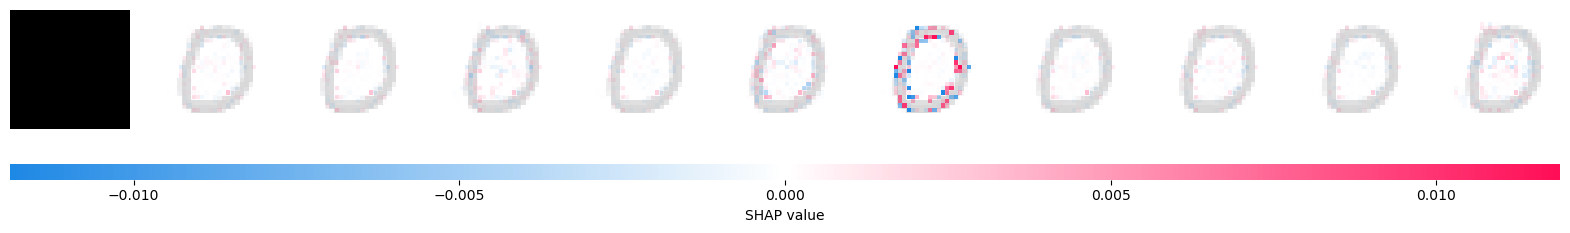

1/1 [==============================] - 0s 91ms/step


In [7]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical')

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Choose a random sample from the test set
sample_idx = np.random.choice(len(test_set))
sample_image = test_set[sample_idx][0][0]

# Reshape the sample_image to match the expected input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

# Create an explainer object
explainer = shap.DeepExplainer(model, data=test_set[0][0])

# Compute SHAP values
shap_values = explainer.shap_values(sample_image)

# Plot the SHAP values
shap.image_plot(shap_values, -sample_image)

# Get the predicted class for the sample
predicted_class = np.argmax(model.predict(sample_image))
#predicted_label = test_set.class_indices[predicted_class]

# Print the predicted label
#print("Predicted label:", predicted_label)


Found 1000 images belonging to 10 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


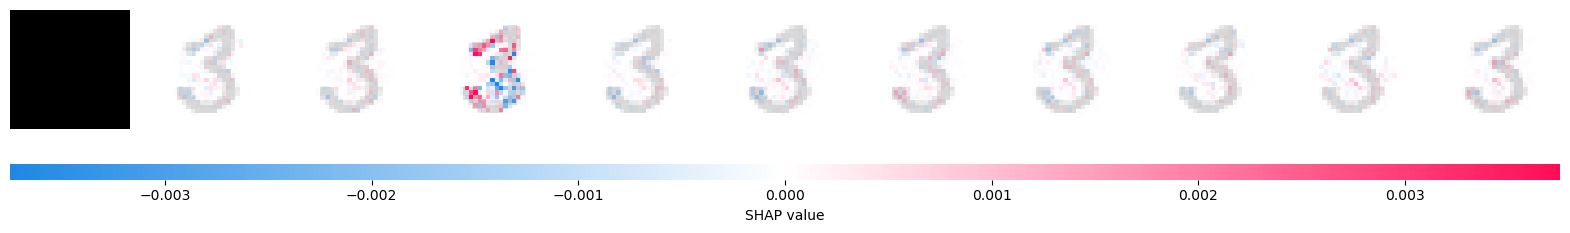

In [4]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical')

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Choose a random sample from the test set
sample_idx = np.random.choice(len(test_set))
sample_image = test_set[sample_idx][0][0]

# Reshape the sample_image to match the expected input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

# Create an explainer object
explainer = shap.DeepExplainer(model, data=test_set[0][0])

# Compute SHAP values
shap_values = explainer.shap_values(sample_image)

# Plot the SHAP values
shap.image_plot(shap_values, -sample_image)

Found 1000 images belonging to 10 classes.
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_1

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


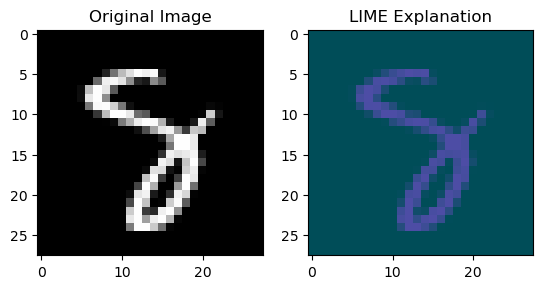

In [25]:
import numpy as np
from skimage.segmentation import slic
from lime import lime_image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical')

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Choose a random sample from the test set
sample_idx = np.random.choice(len(test_set))
sample_image = test_set[sample_idx][0][0]

# Reshape the sample_image to match the expected input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

# Apply superpixel segmentation using SLIC algorithm
segments = slic(sample_image[0], n_segments=100, compactness=10, sigma=1)

# Create an explainer object
explainer = lime_image.LimeImageExplainer()

# Define the prediction function
def predict_fn(images):
    return model.predict(images)

# Explain the image using LIME
explanation = explainer.explain_instance(sample_image[0], predict_fn, top_labels=1, num_samples=1000)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')

# Show the LIME explanation
lime_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.subplot(1, 2, 2)
plt.imshow(lime_image)
plt.imshow(mask, cmap='jet', alpha=0.7)
plt.title('LIME Explanation')

plt.show()


Found 1000 images belonging to 10 classes.
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


IndexError: list index out of range

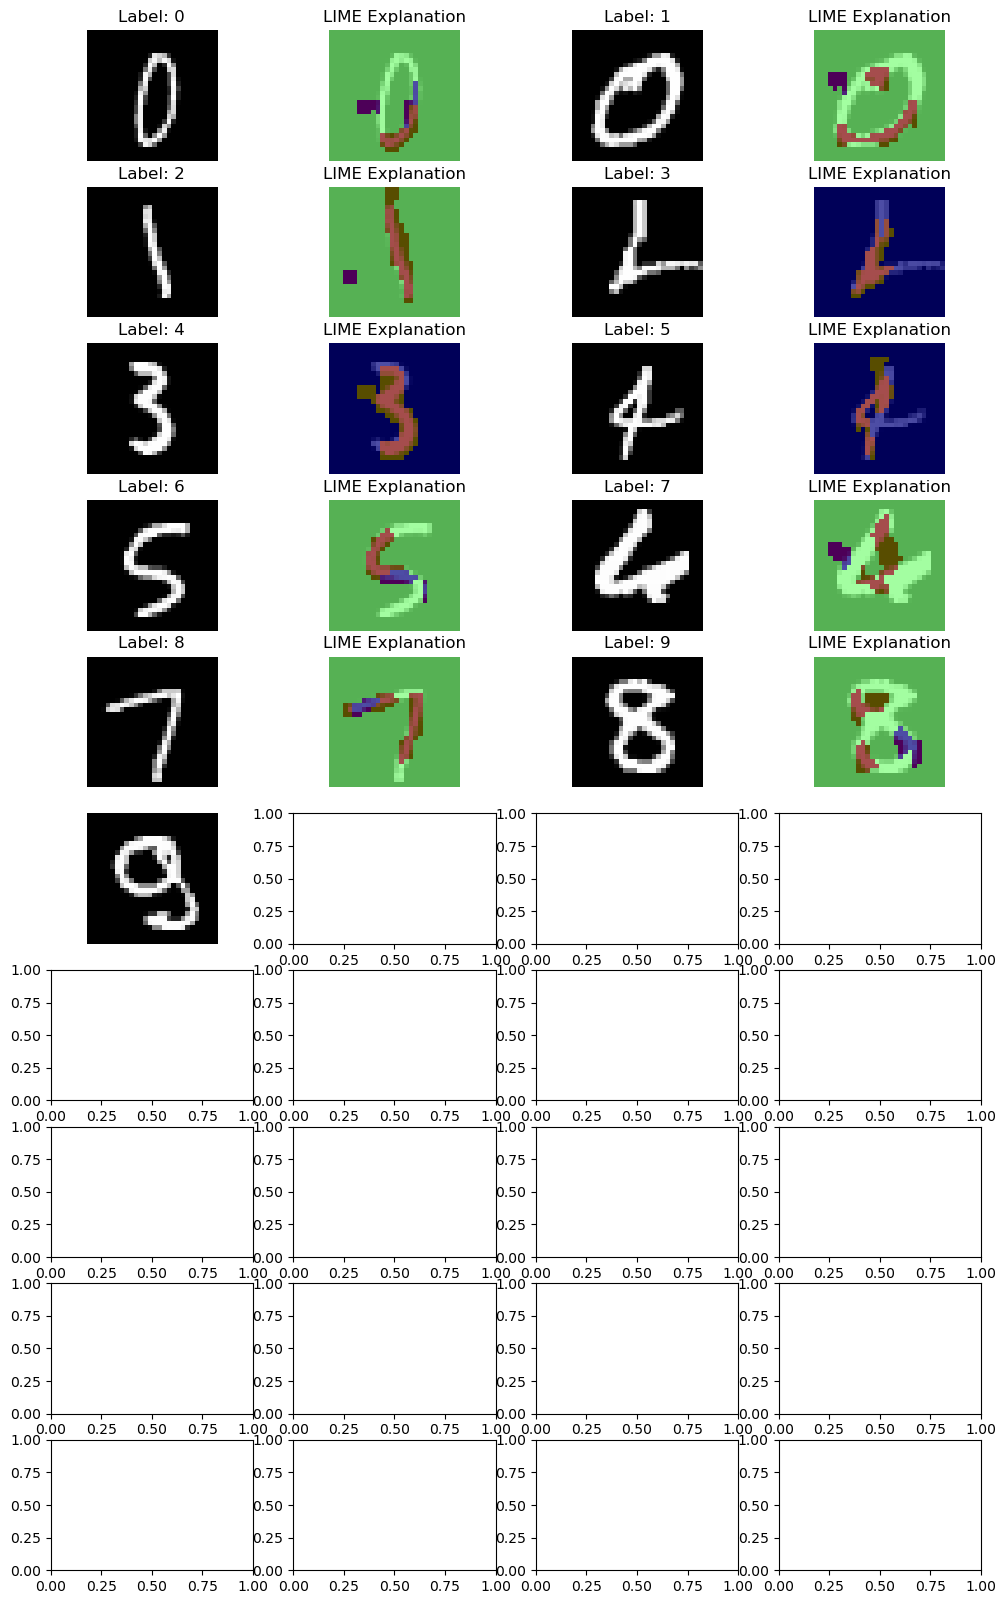

In [39]:
import numpy as np
from skimage.segmentation import slic
from skimage.color import gray2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
import matplotlib.pyplot as plt

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical',
                                             shuffle=False)  # Disable shuffling

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Create an explainer object
explainer = lime_image.LimeImageExplainer()

# Define the prediction function
def predict_fn(images):
    return model.predict(images)

# Keep track of seen classes and corresponding Lime explanations
seen_classes = set()
lime_explanations = []

# Iterate over the test set and explain 2 samples from each class using LIME
for i in range(len(test_set)):
    sample_images = test_set[i][0]
    sample_labels = test_set[i][1]
    
    for j in range(len(sample_images)):
        sample_image = sample_images[j]
        sample_label = np.argmax(sample_labels[j])
        
        # Check if the current sample belongs to a new class or still requires more explanations
        if (len(lime_explanations) < 2) or (sample_label not in seen_classes and len(seen_classes) < 10):
            # Reshape the sample_image to match the expected input shape of the model
            sample_image = np.expand_dims(sample_image, axis=0)
            
            # Apply superpixel segmentation using SLIC algorithm
            segments = slic(sample_image[0], n_segments=100, compactness=10, sigma=1)
            
            # Explain the image using LIME
            explanation = explainer.explain_instance(sample_image[0], predict_fn, top_labels=1, num_samples=1000, segmentation_fn=lambda x: segments)
            
            # Add the explanation to the lime_explanations list
            lime_explanations.append((sample_image[0], explanation))
            
            # Add the class to the seen_classes set
            seen_classes.add(sample_label)
            
        if len(lime_explanations) >= 20:
            break  # Exit the loop if all 20 samples (2 samples from each class) are obtained
            
    if len(lime_explanations) >= 20:
        break  # Exit the outer loop if all 20 samples (2 samples from each class) are obtained

# Display the Lime explanations
fig, axes = plt.subplots(10, 4, figsize=(12, 20))

for i, (image, explanation) in enumerate(lime_explanations):
    ax1 = axes[i // 2, i % 2 * 2]
    ax2 = axes[i // 2, i % 2 * 2 + 1]
    
    # Show the original image
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title('Label: {}'.format(list(seen_classes)[i]))
    
    # Show the Lime explanation
    lime_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
    ax2.imshow(lime_image)
    ax2.imshow(mask, cmap='jet', alpha=0.7)
    ax2.axis('off')
    ax2.set_title('LIME Explanation')

plt.tight_layout()
plt.show()


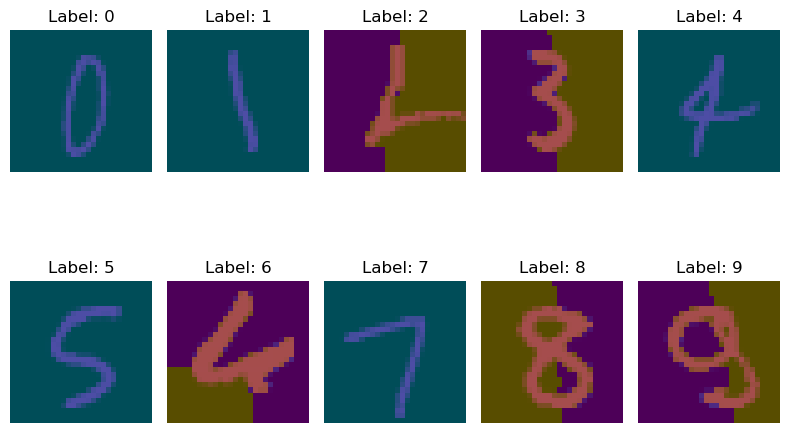

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(8, 6))

for i, (image, explanation) in enumerate(lime_explanations):
    ax = axes[i // 5, i % 5]
    
    # Show the original image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('Label: {}'.format(list(seen_classes)[i]))
    
    # Show the Lime explanation
    lime_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
    ax.imshow(lime_image)
    ax.imshow(mask, cmap='jet', alpha=0.7)

plt.tight_layout()
plt.show()


Found 1000 images belonging to 10 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


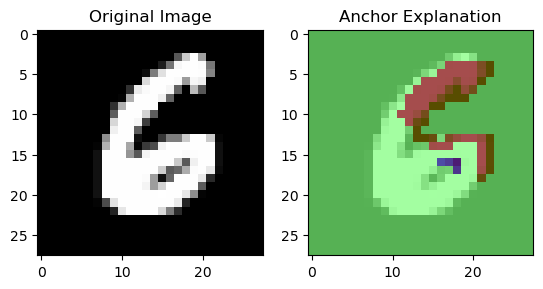

In [12]:
import numpy as np
from skimage.segmentation import slic
from skimage.color import gray2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
import matplotlib.pyplot as plt

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical')

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Choose a random sample from the test set
sample_idx = np.random.choice(len(test_set))
sample_image = test_set[sample_idx][0][0]

# Reshape the sample_image to match the expected input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

# Apply superpixel segmentation using SLIC algorithm
segments = slic(sample_image[0], n_segments=100, compactness=10, sigma=1)

# Create the LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()

# Define the prediction function
def predict_fn(images):
    return model.predict(images)

# Explain the image using Anchor Explanations
explanation = explainer.explain_instance(sample_image[0], predict_fn, top_labels=1, num_samples=1000, segmentation_fn=lambda x: segments)

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0])
plt.title('Original Image')

# Show the Anchor explanation
plt.subplot(1, 2, 2)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(temp)
plt.imshow(mask, cmap='jet', alpha=0.7)
plt.title('Anchor Explanation')

plt.show()


Found 1000 images belonging to 10 classes.
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 54ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


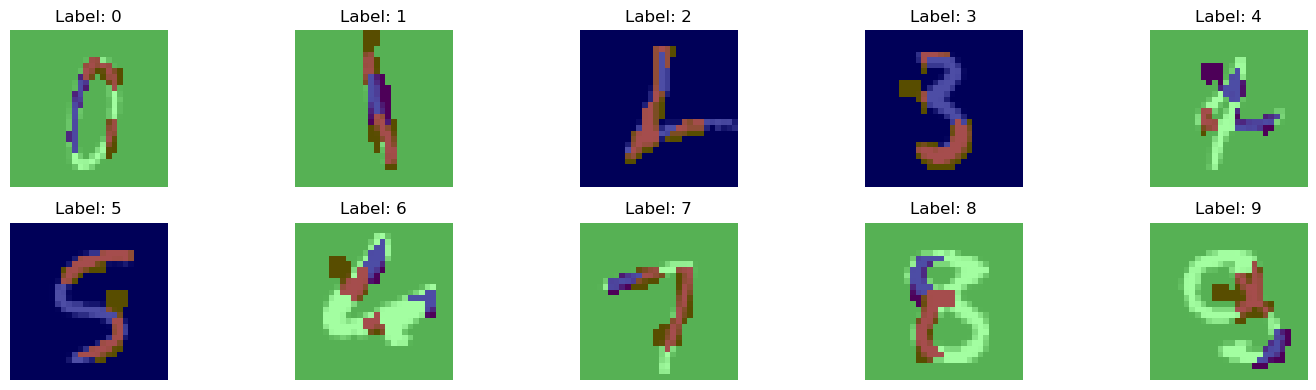

In [41]:
import numpy as np
from skimage.segmentation import slic
from skimage.color import gray2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from lime import lime_image
import matplotlib.pyplot as plt

# Define the image data generator and load the test set
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32')
test_set = image_datagen.flow_from_directory('final_project_dataset/Test/',
                                             target_size=(28, 28),
                                             batch_size=10,
                                             class_mode='categorical',
                                             shuffle=False)  # Disable shuffling

# Load the trained model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Create an explainer object
explainer = lime_image.LimeImageExplainer()

# Define the prediction function
def predict_fn(images):
    return model.predict(images)

# Keep track of seen classes and corresponding Anchor explanations
seen_classes = set()
anchor_explanations = []

# Iterate over the test set and explain a single sample from each class using Anchor explanations
for i in range(len(test_set)):
    sample_images = test_set[i][0]
    sample_labels = test_set[i][1]
    
    for j in range(len(sample_images)):
        sample_image = sample_images[j]
        sample_label = np.argmax(sample_labels[j])
        
        # Check if the current sample belongs to a new class
        if sample_label not in seen_classes:
            # Reshape the sample_image to match the expected input shape of the model
            sample_image = np.expand_dims(sample_image, axis=0)
            
            # Apply superpixel segmentation using SLIC algorithm
            segments = slic(sample_image[0], n_segments=100, compactness=10, sigma=1)
            
            # Explain the image using Anchor explanations
            explanation = explainer.explain_instance(sample_image[0], predict_fn, top_labels=1, num_samples=1000, segmentation_fn=lambda x: segments)
            
            # Add the explanation to the anchor_explanations list
            anchor_explanations.append((sample_image[0], explanation))
            
            # Add the class to the seen_classes set
            seen_classes.add(sample_label)
            
            if len(seen_classes) == 10:
                break  # Exit the loop if all 10 classes are seen
            
    if len(seen_classes) == 10:
        break  # Exit the outer loop if all 10 classes are seen

# Display the Anchor explanations
fig, axes = plt.subplots(2, 5, figsize=(15, 4))

for i, (image, explanation) in enumerate(anchor_explanations):
    ax = axes[i // 5, i % 5]
    
    # Show the original image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title('Label: {}'.format(list(seen_classes)[i]))
    
    # Show the Anchor explanation
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
    ax.imshow(temp)
    ax.imshow(mask, cmap='jet', alpha=0.7)

plt.tight_layout()
plt.show()
